In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Taller 6

Métodos Computacionales, 2015-19

Sebastián Puerto, 201318518

Lectura de archivo:

In [2]:
data = np.genfromtxt('datos_caminata.csv', delimiter = ';')

In [3]:
lons = data[:, 0]
lats = data[:, 1]
years = data[:, 2]
months = data[:, 3]
days = data[:, 4]
hours = data[:, 5]
minutes = data[:, 6]
seconds = data[:, 7]

Para cambio de coordenadas:

In [4]:
R = 6.3674447E6 #metros

def xyz(lon, lat, r = R):
    # Función para cambio de coordenadas geográficas a cartesianas
    
    return array([r*np.sin(np.pi/180. * (90 - lat))*cos(np.pi/180. * (lon)),
                  r*np.sin(np.pi/180. * (90 - lat))*sin(np.pi/180. * (lon)),
                  r*np.cos(np.pi/180. * (90 - lat))]
                  )

xyz_vec = np.vectorize(xyz)

Vectores de desplazamiento espacio temporales:

In [17]:
poss = array([xyz(lons[i], lats[i], R) for i in range(len(lons))])

r_0 = xyz(lons[0], lats[0], R)
t_0 = seconds[0] + 60 * minutes[0] + 3600 * hours[0]

disps = poss - r_0
dtimes = array([(seconds[i] - seconds[0]) + 
                60 * (minutes[i] - minutes[0]) + 
                3600 * (hours[i] - hours[0]) 
               for i in range(len(lons))])

#vects = array([np.append(disps[i], dtimes[i]) for i in range(len(lons))])
vects = array([array([disps[i, 0], disps[i, 1], dtimes[i]]) for i in range(len(lons))])

Vector Unitario y coordenadas de los vectores de desplazamiento espacio temporales

(-600.0, 100.0, -350.0, 50.0)

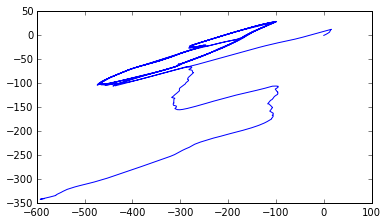

In [39]:
unit_v = np.append(xyz(-74.0758, 4.5981, R)[0 : 2], 1) - r_0

coords = vects / unit_v

plt.plot(vects[:, 0], vects[:, 1])
plt.axis('scaled')